In [394]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import *
import scipy.stats as stats
plt.style.use('default')

# Ejercicio 2

Se tira una moneda 100 veces y salen 55 cecas. Calcular el estimador de maxima verosimilitud y simular.

Tirar una moneda es un experimento de Bernoulli con $P(X=1) = p$ y $P(X=0) = 1-p$\
Si tenemos una secuencia de 100 experimentos de Bernoulli es una Binomial $\sim \mathcal{B}(n=100,p)$ donde son n=100 experimentos y podemos calcular la probabilidad de tener $x$ exitos en esos $n$ experimentos\
Asi, $P(X=x)=p^x * (1-p)^{n-x}$ en particular para nuestro caso $P(X=55)=p^{55} * (1-p)^{100-55} = p^{55} * (1-p)^{45}$.\
Lo que queremos hacer con un **Estimador de Maxima Verosimilitud** es encontrar el **parametro p que maximice esa probabilidad**.\
Para hacerlo, se utiliza el **log likelihood** ya que facilita las cuentas y al ser una funcion monotona no afecta las soluciones optimas. Se deriva respecto del parametro p e iguala a 0 para encontrar el optimo.
\begin{equation}
\begin{split}
 P(X=55)& = p^{55} * (1-p)^{45}\:\; \textrm{Tomamos logaritmos} \\
        & = \log{(p^{55} * (1-p)^{45})} \\
        & = \log{p^{55}} + \log{(1-p)^{45}} \\
        & = 55\log{(p)} + 45\log{(1-p)} \textrm{Tomamos derivada e igualamos a 0} \\
\frac{dP}{dp} & = \frac{d}{dp} \big(55\log{(p)} + 45\log{(1-p)} \big) = 0 \\
        & 55 \frac{1}{p} - 45 \frac{1}{1-p} = 0\:\; \textrm{Resolviendo algebraicamente}\\
       p^{*} &= \frac{55}{100}
\end{split}
\end{equation}

Entonces $p^{*} = \frac{55}{100}$ es el estimador de maxima verosimilitud dadas las observaciones disponibles.

# Ejercicio 3

Simular una Gaussiana (0,1) y estimar su pdf con histogramas.

Primero vemos diferentes combinaciones de tamaño de muestra y bines, comparando los histogramas generados y la pdf real.

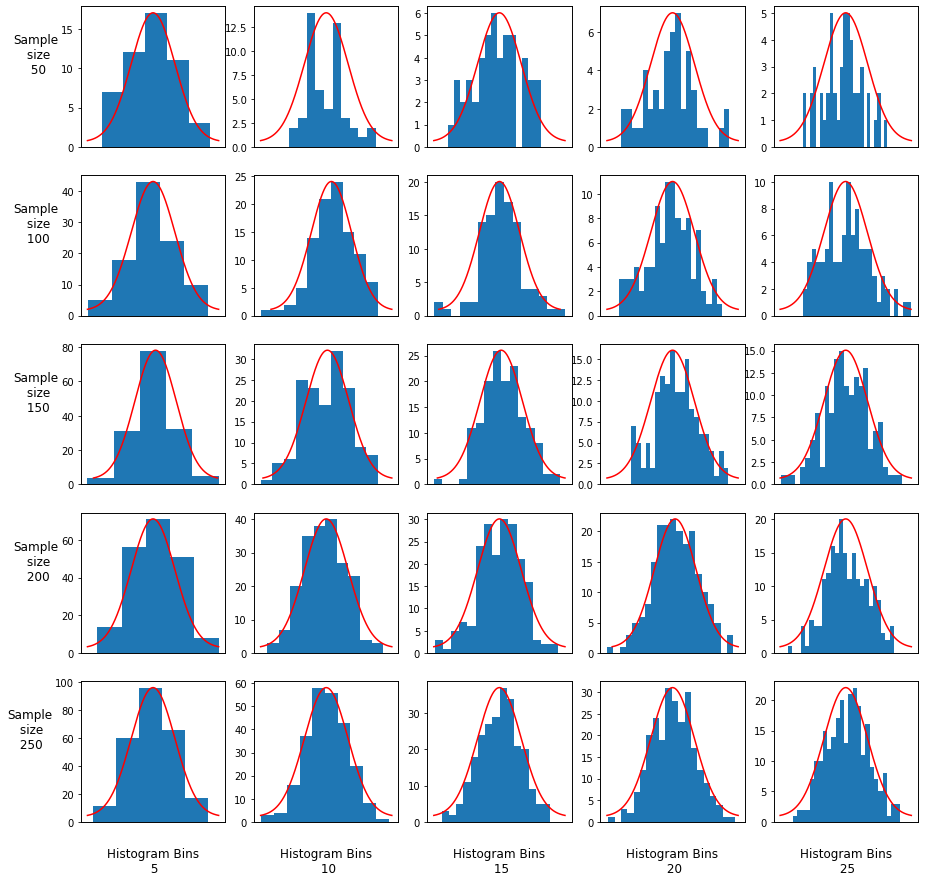

In [2]:
f, ax = plt.subplots(ncols=5,nrows=5,figsize=(15,15))
x = np.linspace(start=-3,stop=3,num=500) # Crea un array de 500 valores equiespaciados para la campana
for i in range(5):    # Cada fila
    for j in range(5): # Cada columna
        bines = 5*(j+1) # Cantidad de bines
        sample_size = 50*(i+1) # Tam. de la muestra
        sample = np.random.normal(0,1,sample_size) # Genera la muestra
        ax[i][j].hist(sample,bins=bines) # Plotea el histograma
        ax[i][j].set_xticks([]) # Eliminar los X ticks para claridad 
        aux_ax = ax[i][j].twinx() # Crea eje auxiliar para plotear campana
        aux_ax.plot(x, stats.norm.pdf(x, 0, 1),color='red') # Plotea campana 
        aux_ax.set_yticks([]) # Elimina ticks para claridad 
        
    ax[4][i].set_xlabel('Histogram Bins\n {}'.format(5*(i+1)),fontsize=12,rotation=0,labelpad=25,fontweight=3) # Etiqueta de cantidad de bines
    ax[i][0].set_ylabel('Sample\n size\n {}'.format(sample_size),fontsize=12,rotation=0,labelpad=25,fontweight=3) # Etiqueta de tam. de muestra
        
plt.show()

In [124]:
def binnerizer(X,dist=7.5,bines=50):
    '''
    Implementada solo para numero par de bines
    Genera bines y cuenta cuenta la frecuencia absoluta
    '''
    lw_lim = -dist
    up_lim = dist
    bin_limits = np.linspace(lw_lim,up_lim,bines+1)
    limits = len(bin_limits)
    midbin = int(bines/2)
    bincount= np.zeros(bines)
    for x in X:
        if x < 0:
            for i in range(0,midbin):
                if x > bin_limits[i] and x <= bin_limits[i+1]:
                    bincount[i] += 1
        else:
            for i in range(midbin,limits):
                    if x > bin_limits[i] and x <= bin_limits[i+1]:
                        bincount[i] += 1
    return bincount

def pdf_from_histogram(bincount,bines=50,dist=7.5):
    '''
    Genera la pdf aproximada por el histograma.
    '''
    lw_lim = -dist
    up_lim = dist
    total = bincount.sum()
    rel_freq = bincount / total
    bin_length = (2*dist)/bines # Trabajamos siempre con intervalos simetricos
    estimated_pdf = rel_freq/bin_length
    return estimated_pdf

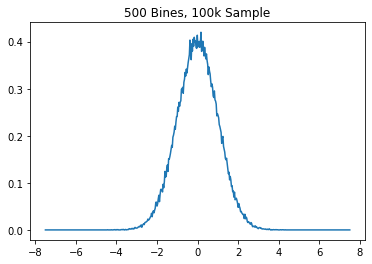

In [150]:
sample = stats.norm.rvs(0,1,100000) # Muestrea una normal 100000 samples
freq_abs = binnerizer(sample,bines=500) # 500 bines
numerical_pdf = pdf_from_histogram(freq_abs,500,7.5) # Genera la pdf estimada
x = np.linspace(-7.5,7.5,500) # Genera el eje x
plt.plot(x,numerical_pdf) # Plotea la densidad aproximada
plt.title('500 Bines, 100k Sample')
plt.show()

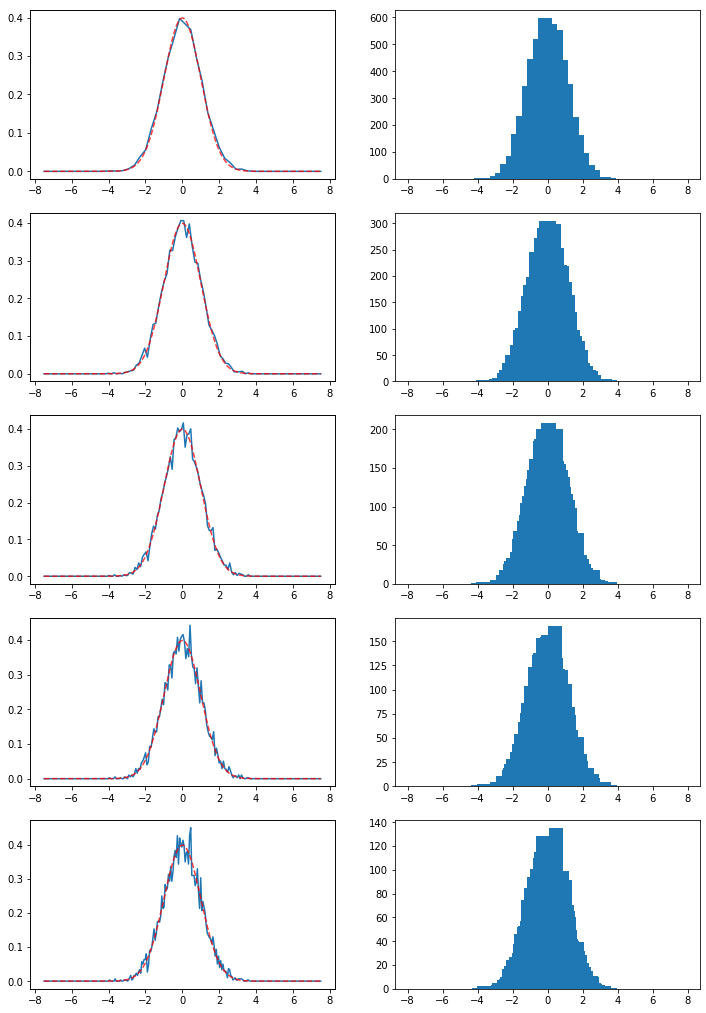

In [153]:
f,ax = plt.subplots(figsize=(12,18),ncols=2,nrows=5)
sample = stats.norm.rvs(0,1,5000)

for i in range(5):
    bines = 50*(i+1) # Aumento los bines de a 10
    freq_abs = binnerizer(sample,bines=bines) # Hago el array del histograma
    numerical_pdf = pdf_from_histogram(freq_abs,bines,7.5)  # Calcula la pdf
    x = np.linspace(-7.5,7.5,bines) # Genera el eje x de dimensiones que admite la pdf generada
    ax[i][0].plot(x,numerical_pdf) # Grafica la pdf estimada
    
    # Normal roja
    aux_ax = ax[i][0].twiny()
    aux_ax_x = np.linspace(-7.5,7.5,1001)
    aux_ax.plot(aux_ax_x,stats.norm.pdf(aux_ax_x,0,1),color='red',alpha=0.75,ls='--')
    aux_ax.set_xlabel('')
    aux_ax.set_xticks([])
    
    #Histograma
    ax[i][1].bar(x=x,height=freq_abs)
    
plt.show()

# Ejercicio 4

La estimacion por kernel es

\begin{equation}
\hat{p_n}(x) = \frac{1}{nh}\sum_{i=1}^n K\big(\frac{x_i - x}{h} \big)
\end{equation}
Donde K es la funcion kernel, en nuestro caso una Gaussiana con media en el punto y varianza 1, y h es un factor de filtrado, que termina afectando la varianza final de nuestro estimador. 

In [403]:
def kernel(x):
    kernel_i = stats.norm(loc=x,scale=1)
    return kernel_i


In [404]:
def kernel_estimation(kernels,x,h=1):
    n = len(kernels)
    cumsum = 0 
    for kernel in kernels:
        media = kernel.stats('m')
        cumsum += kernel.pdf((media-x)/h)
    density = 1/(n*h) * cumsum
    return density
    
    

## Estimacion de una Gaussiana

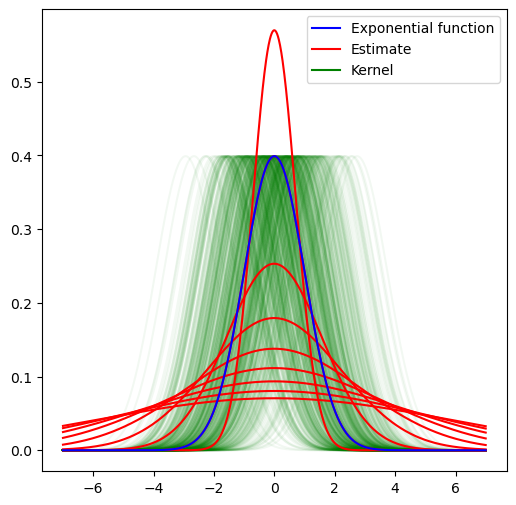

In [405]:
normal_sample = stats.norm.rvs(0,1,500)
kernels = np.array([])
for sample in normal_sample:
    kernels = np.append(kernels,kernel(sample))
    
f, ax = plt.subplots(figsize=(6,6))
x = np.linspace(-7,7,1000)
ax.plot(x,stats.norm.pdf(x),color='blue',zorder=2)

# Custom legend
handles = [plt.Line2D([0],[0],color='blue'),
           plt.Line2D([0],[0],color='red'),
           plt.Line2D([0],[0],color='green')]
labels = ['Exponential function', 'Estimate', 'Kernel']
ax.legend(handles,labels)


for k in kernels:
    ax.plot(x,k.pdf(x),color='green',alpha=0.05,zorder=0)

for h in range(1,10,1):
    ax.plot(x,kernel_estimation(kernels,x,h=h/2),color='red',zorder=1)
plt.show()

## Estimacion de una Exponencial

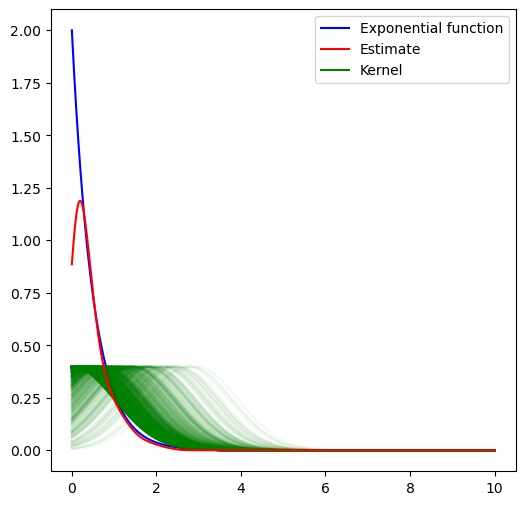

In [406]:

lam = 2 # Lambda de la exponencial
exp_sample = np.random.exponential(1/lam,size=1000) # Muestra de la exponencial

kernels = np.array([]) #Contenedor de Kernels
for sample in exp_sample: #Generador de kernels
    kernels = np.append(kernels,kernel(sample))

f, ax = plt.subplots(figsize=(6,6))

x = np.linspace(0,10,1001) # Eje X
ax.plot(x,lam * np.exp(-lam*x),color='blue') # Curva original

for k in kernels: # Plotea todos los kernels utilizados
    ax.plot(x,k.pdf(x),color='green',alpha=0.05)

ax.plot(x,kernel_estimation(kernels,x,h=0.2),color='red') # Plotea la estimacion


# Custom legend
handles = [plt.Line2D([0],[0],color='blue'),
           plt.Line2D([0],[0],color='red'),
           plt.Line2D([0],[0],color='green')]
labels = ['Exponential function', 'Estimate', 'Kernel']
ax.legend(handles,labels)


#for h in range(1,5,1):
#    ax.plot(x,kernel_estimation(kernels,x,h=h/50),color='red')
plt.show()


## Estimación de una exponencial método 2

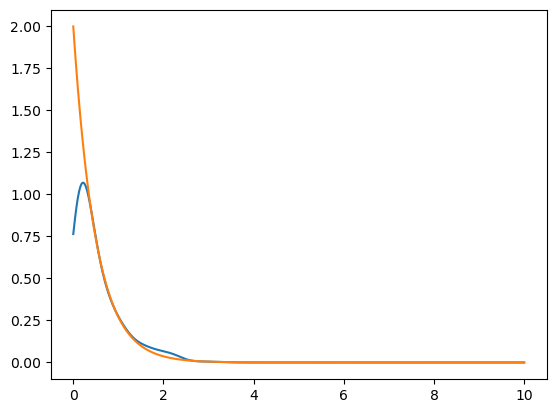

In [410]:
M = 10000 # Mesh del Linspace
h = 0.2 # H del kernel
n = 1000 # Samples

lam = 2 # Parametro de la exponencial

sample = np.random.exponential(1/lam, size=n) #Muestre
x_min = 0 # Limite inferior
x_max = 10 # Limite superior

x = np.linspace(x_min, x_max, M+1 ) # Genera el mesh del eje X

kpdf = np.zeros(shape = kern.shape) # Contenedor de la pdf
for i in range(n): # Para cada punto muestral
    K = stats.norm(loc=sample[i], scale=h).pdf(x) # Calcula la pdf de una Normal centrada en el punto, para todo el linspace
    kpdf = kpdf + K # Suma a la pdf acumulada
kpdf = kpdf/(n) # Promedia para los n puntos

plt.plot(x, kpdf)
plt.plot(x, lam * np.exp(-lam*x))
plt.show()
